In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [8]:
data = pd.read_csv('C:\\Users\\jayak\\OneDrive\\Desktop\\Data Analytics\\outlierex.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          18 non-null     int64 
 1   Name        18 non-null     object
 2   Age         18 non-null     int64 
 3   Salary      18 non-null     int64 
 4   Department  18 non-null     object
dtypes: int64(3), object(2)
memory usage: 852.0+ bytes


In [11]:
data.head()

,ID,Name,Age,Salary,Department
0,1,John Doe,28,50000,Engineering
1,2,Jane Smith,35,60000,Marketing
2,3,Michael Johnson,42,45000,Engineering
3,4,Emily Davis,22,52000,Sales
4,5,Chris Wilson,45,120000,Engineering


In [13]:
def f_anomolies(data):
    
    anomalies = []
        
    rand_std = statistics.stdev(data)
    rand_mean = statistics.mean(data)

    anomaly_cutoff = rand_std *3

    lower_limit = rand_mean - anomaly_cutoff
    upper_limit = rand_std + anomaly_cutoff 

    for outlier in data:
        if outlier > upper_limit or outlier <lower_limit:
            anomalies.append(outlier)
    return anomalies


    

In [14]:
data.Salary

0      50000
1      60000
2      45000
3      52000
4     120000
5      54000
6      60000
7      70000
8     130000
9      55000
10     62000
11     48000
12     70000
13     65000
14     53000
15     51000
16     49000
17    150000
Name: Salary, dtype: int64

In [15]:
list1= f_anomolies(data['Salary'])

In [16]:
len(list1)

2

In [17]:
data.Salary.skew()

1.859200179950535

<Axes: xlabel='Salary', ylabel='Density'>

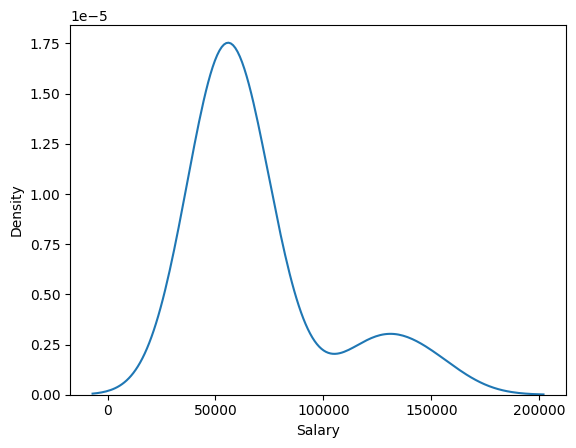

In [20]:
import seaborn as sns
sns.kdeplot(data.Salary)

In [22]:
data['Salary_transformed']= np.log(data.Salary)

In [24]:
data.Salary_transformed.skew()

1.511536365813153

In [25]:
list2 = f_anomolies(data.Salary_transformed)

In [26]:
len(list2)

18

<Axes: xlabel='Salary_transformed', ylabel='Density'>

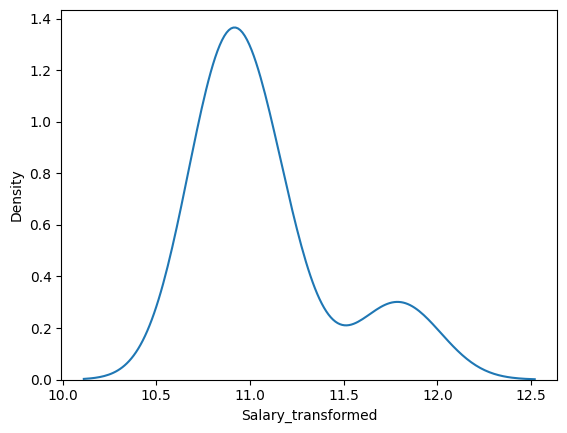

In [28]:
sns.kdeplot(data.Salary_transformed)